### Adult Income - ML Logistic Regression

The goal is to predict whether a person earns more than $50K or not. We are going to use logistic r

In [323]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [324]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

**Data collection and processing**

In [326]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

In [327]:
# combine/merge the two dataframes so that we can clean and/or fix issues that might come up then split them later

df = pd.concat([X, y], axis=1)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [328]:
df.shape

(48842, 15)

In [329]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [331]:
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [332]:
df = df.dropna()

df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [333]:
df.shape

(47621, 15)

In [334]:
df['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [335]:
# Convert categorical data into binary in the 'income' column

df['income'] = df['income'].replace({'<=50K': 0, '<=50K.': 0, '>50K': 1, '>50K.': 1})

**Exploratory Data Analysis**

1. Numerical features

In [338]:
sns.set()

C:\Users\Gran\AppData\Local\Temp\ipykernel_41808\2035571640.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


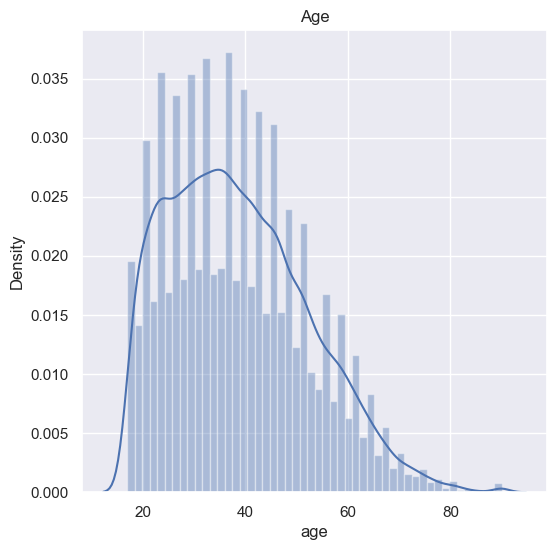

In [339]:
# age distribution
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age')
plt.show()

C:\Users\Gran\AppData\Local\Temp\ipykernel_41808\2921577922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fnlwgt'])


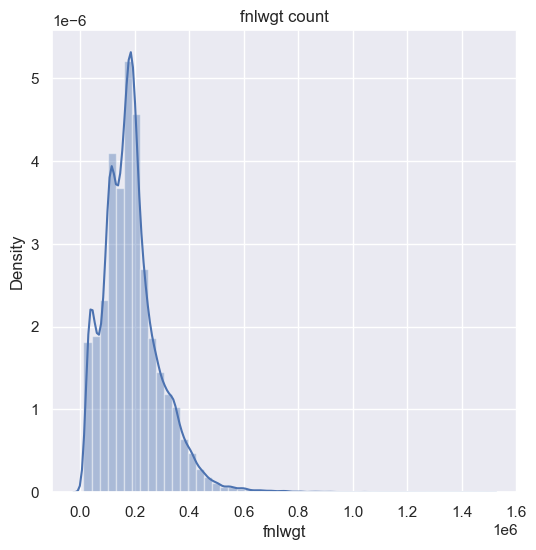

In [340]:
# fnlwgt distribution
plt.figure(figsize=(6,6))
sns.distplot(df['fnlwgt'])
plt.title('fnlwgt count')
plt.show()

C:\Users\Gran\AppData\Local\Temp\ipykernel_41808\98265582.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['capital-gain'])


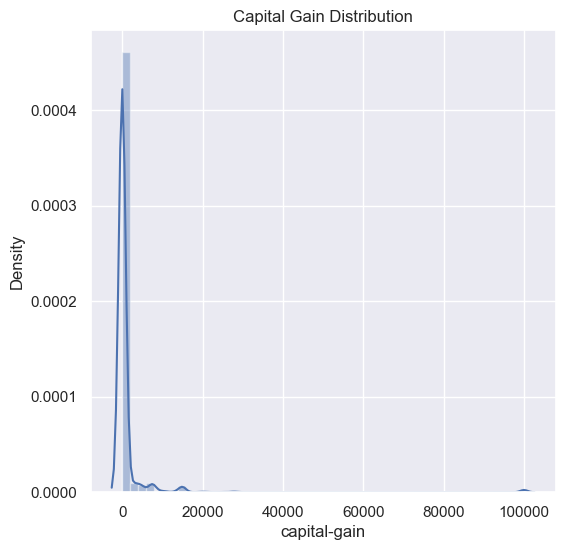

In [341]:
# capital-gain distribution
plt.figure(figsize=(6,6))
sns.distplot(df['capital-gain'])
plt.title('Capital Gain Distribution')
plt.show()

C:\Users\Gran\AppData\Local\Temp\ipykernel_41808\201676792.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['capital-loss'])


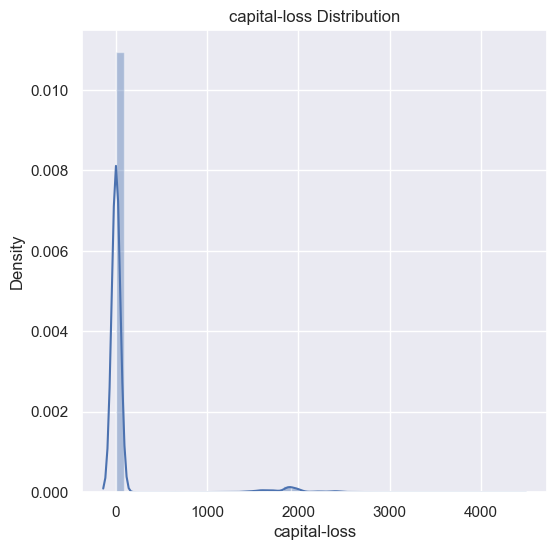

In [342]:
# capital-loss distribution
plt.figure(figsize=(6,6))
sns.distplot(df['capital-loss'])
plt.title('capital-loss Distribution')
plt.show()

C:\Users\Gran\AppData\Local\Temp\ipykernel_41808\2365748099.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['hours-per-week'])


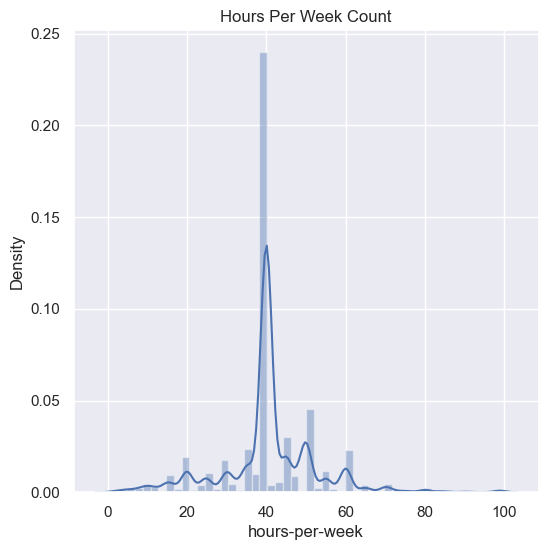

In [343]:
# hours-per-week distribution
plt.figure(figsize=(6,6))
sns.distplot(df['hours-per-week'])
plt.title('Hours Per Week Count')
plt.show()


2. Categorical features

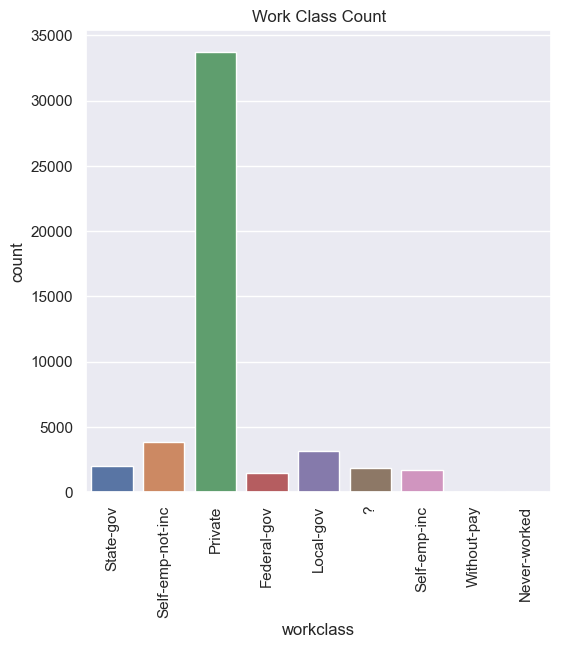

In [345]:
# workclass distribution
plt.figure(figsize=(6,6))
sns.countplot(x='workclass', data=df)
plt.title('Work Class Count')
plt.xticks(rotation=90)
plt.show()

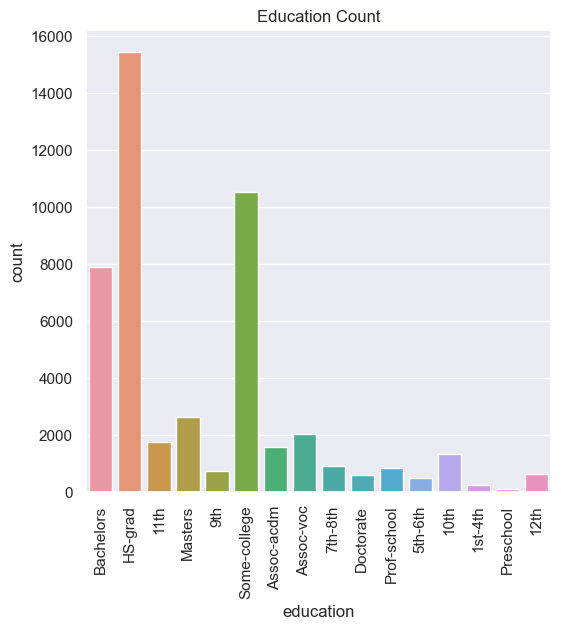

In [346]:
# education distribution
plt.figure(figsize=(6,6))
sns.countplot(x='education', data=df)
plt.title('Education Count')
plt.xticks(rotation=90)
plt.show()

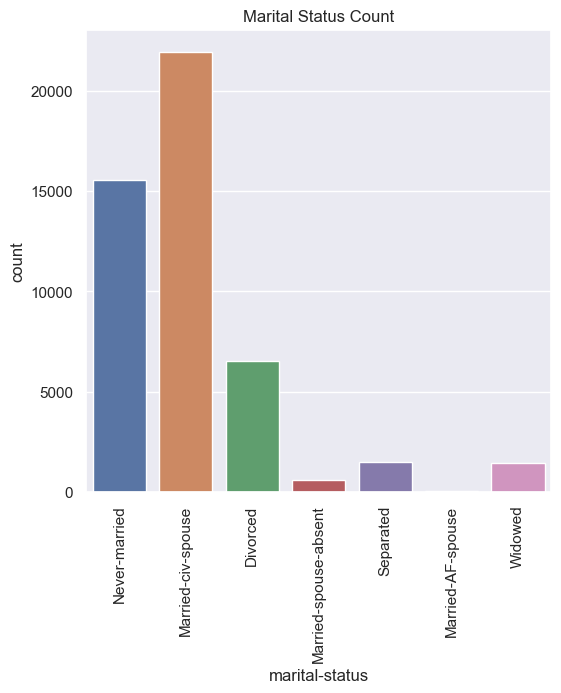

In [347]:
# marital-status distribution
plt.figure(figsize=(6,6))
sns.countplot(x='marital-status', data=df)
plt.title('Marital Status Count')
plt.xticks(rotation=90)
plt.show()

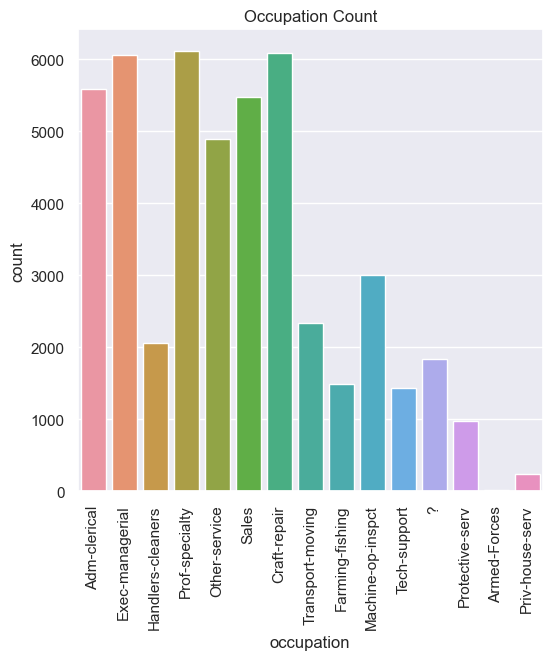

In [348]:
# occupation distribution
plt.figure(figsize=(6,6))
sns.countplot(x='occupation', data=df)
plt.title('Occupation Count')
plt.xticks(rotation=90)
plt.show()

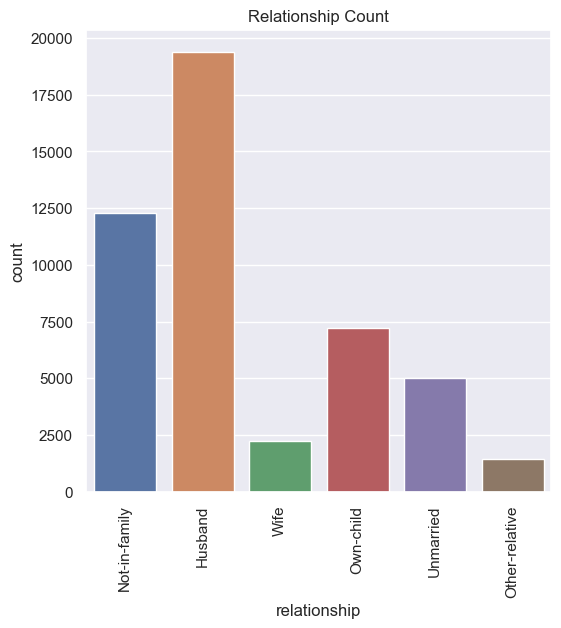

In [349]:
# relationship distribution
plt.figure(figsize=(6,6))
sns.countplot(x='relationship', data=df)
plt.title('Relationship Count')
plt.xticks(rotation=90)
plt.show()

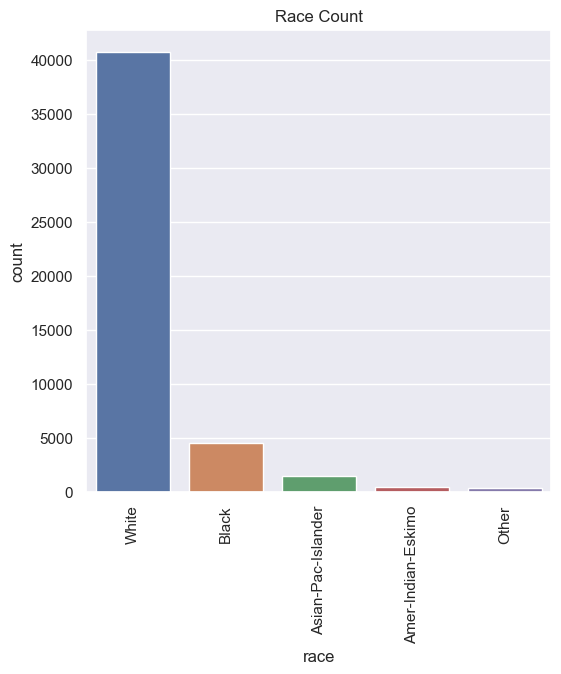

In [350]:
# race distribution
plt.figure(figsize=(6,6))
sns.countplot(x='race', data=df)
plt.title('Race Count')
plt.xticks(rotation=90)
plt.show()

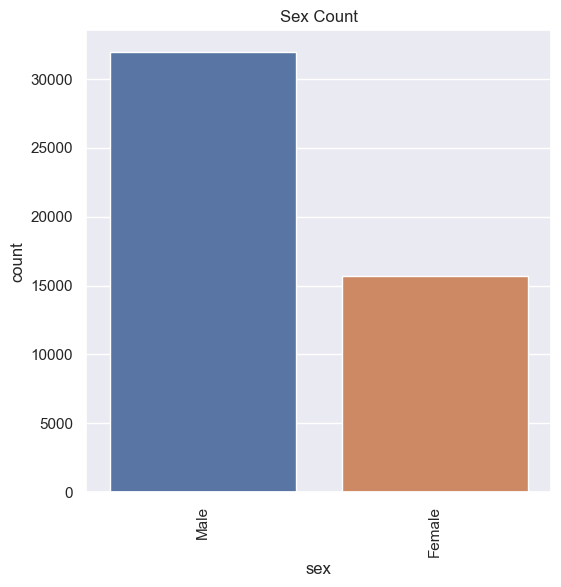

In [351]:
# sex distribution
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Count')
plt.xticks(rotation=90)
plt.show()

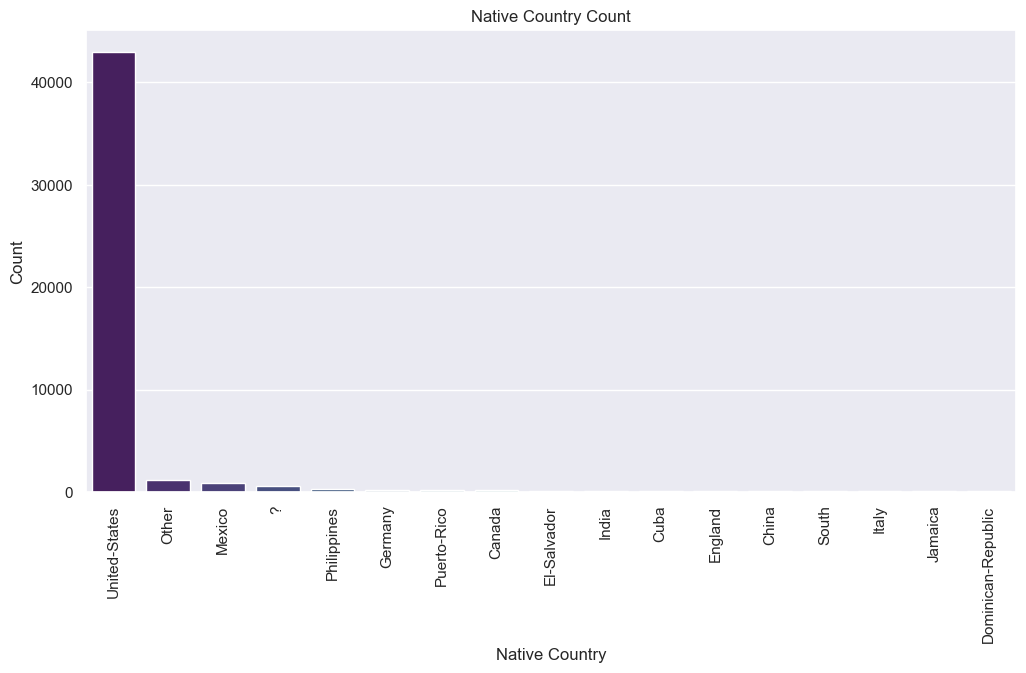

In [352]:
# native-country distribution

# threshold for binning less frequent categories into 'Other'
threshold = 100

# value counts for 'native-country'
country_counts = df['native-country'].value_counts()

# Identify countries that will be grouped into 'Other'
countries_to_replace = country_counts[country_counts < threshold].index

# Replace these countries with 'Other'
df['native-country'] = df['native-country'].replace(countries_to_replace, 'Other')

# native-country distribution with binned counts
plt.figure(figsize=(12,6))
sns.countplot(x='native-country', data=df, palette='viridis', order=df['native-country'].value_counts().index)
plt.title('Native Country Count')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

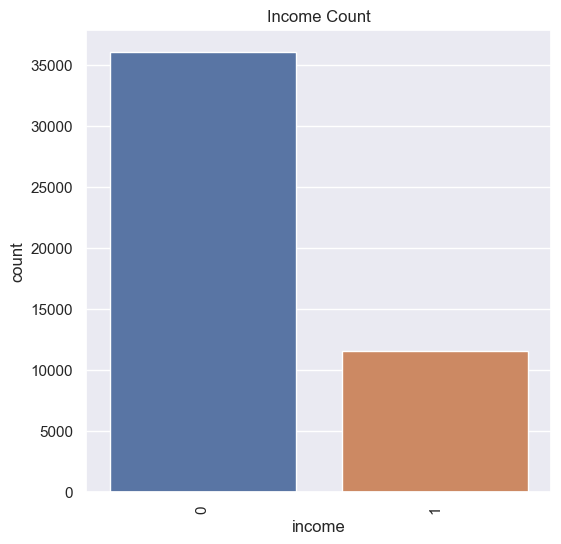

In [353]:
# income distribution
plt.figure(figsize=(6,6))
sns.countplot(x='income', data=df)
plt.title('Income Count')
plt.xticks(rotation=90)
plt.show()

**Label encoding**

In [355]:
# Instantiate LabelEncoder
encoder = LabelEncoder()

# Give one label to each unique value in a column. **Converts categorical features to numerical
df['workclass'] = encoder.fit_transform(df['workclass'])
df['education'] = encoder.fit_transform(df['education'])
df['marital-status'] = encoder.fit_transform(df['marital-status'])
df['occupation'] = encoder.fit_transform(df['occupation'])
df['relationship'] = encoder.fit_transform(df['relationship'])
df['race'] = encoder.fit_transform(df['race'])
df['sex'] = encoder.fit_transform(df['sex'])
df['native-country'] = encoder.fit_transform(df['native-country'])

df.head(100)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,16,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,16,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,16,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,16,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29,2,115585,15,10,4,6,1,4,1,0,0,50,16,0
96,48,6,191277,10,16,2,10,0,4,1,0,1902,60,16,1
97,37,4,202683,15,10,2,12,0,4,1,0,0,48,16,1
98,48,4,171095,7,12,0,4,4,4,0,0,0,40,6,0


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47621 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             47621 non-null  int64
 1   workclass       47621 non-null  int32
 2   fnlwgt          47621 non-null  int64
 3   education       47621 non-null  int32
 4   education-num   47621 non-null  int64
 5   marital-status  47621 non-null  int32
 6   occupation      47621 non-null  int32
 7   relationship    47621 non-null  int32
 8   race            47621 non-null  int32
 9   sex             47621 non-null  int32
 10  capital-gain    47621 non-null  int64
 11  capital-loss    47621 non-null  int64
 12  hours-per-week  47621 non-null  int64
 13  native-country  47621 non-null  int32
 14  income          47621 non-null  int64
dtypes: int32(8), int64(7)
memory usage: 4.4 MB


In [357]:
# Convert all int32 columns to int64
for col in df.select_dtypes(include=['int32']).columns:
    df[col] = df[col].astype('int64')

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47621 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             47621 non-null  int64
 1   workclass       47621 non-null  int64
 2   fnlwgt          47621 non-null  int64
 3   education       47621 non-null  int64
 4   education-num   47621 non-null  int64
 5   marital-status  47621 non-null  int64
 6   occupation      47621 non-null  int64
 7   relationship    47621 non-null  int64
 8   race            47621 non-null  int64
 9   sex             47621 non-null  int64
 10  capital-gain    47621 non-null  int64
 11  capital-loss    47621 non-null  int64
 12  hours-per-week  47621 non-null  int64
 13  native-country  47621 non-null  int64
 14  income          47621 non-null  int64
dtypes: int64(15)
memory usage: 5.8 MB


<Axes: >

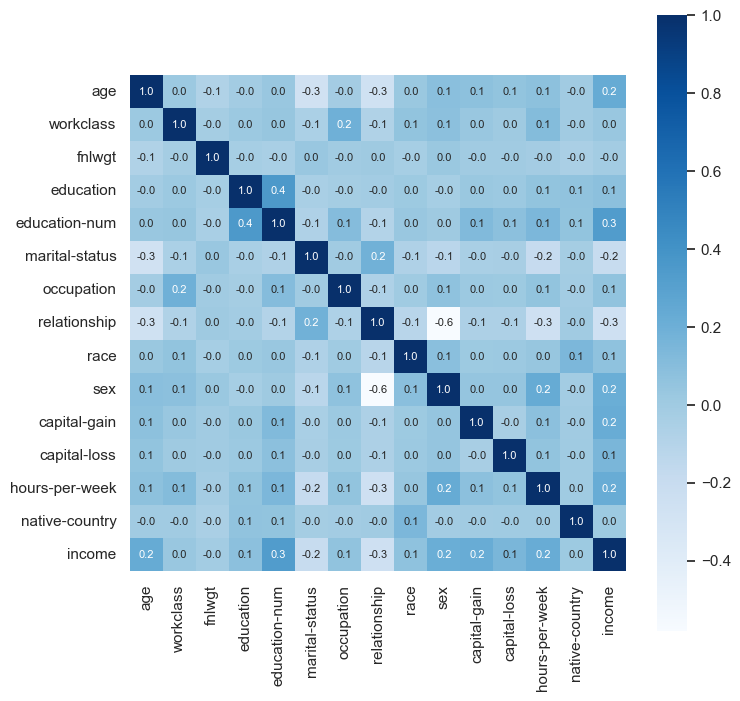

In [359]:
# plotting a correlation heatmap
correlation = df.corr()

plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8},cmap='Blues')

In [360]:
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,47621.000000,47621.000000,4.762100e+04,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000
mean,38.640684,3.946893,1.897271e+05,10.290040,10.090821,2.606602,6.704395,1.432141,3.671489,0.670650,1091.137649,87.853489,40.600050,15.271288,0.242351
std,13.558961,1.371859,1.055695e+05,3.856378,2.568320,1.505946,4.168429,1.601278,0.842198,0.469982,7487.228336,404.010612,12.260345,2.656809,0.428510
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.175840e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,16.000000,0.000000
50%,37.000000,4.000000,1.782820e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,16.000000,0.000000
75%,48.000000,4.000000,2.377200e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,16.000000,0.000000
max,90.000000,8.000000,1.490400e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,16.000000,1.000000


**Separating Features and Targets**

In [362]:
# Separate the DataFrame df into two parts: X contains all the features (by dropping the 'income' column), and Y contains the 'income' column (the target variable). 
# -- This separation is typically done in preparation for training a machine learning model.

X = df.drop(columns='income', axis=1)
y = df['income']

**Split data into training and testing data**

In [364]:
# Split the dataset into training and testing sets. 
# -- Specifically, 80% of the data is allocated for training, and 20% is allocated for testing, with a random seed to ensure reproducibility.

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state = 3)

In [365]:
print(X.shape, X_train.shape, X_test.shape)

(47621, 14) (38096, 14) (9525, 14)


**Scaling the data**

In [367]:
# Initialize the scaler
scaler = StandardScaler()

In [368]:
# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Model training: Logistic Regression**

Since we are predicting whether a person earns more than $50K or not. We can use Logistic Regression because it works well for binary classification problems and provides probabilities for the class labels, which can be useful for understanding the confidence of predictions.

In [370]:
# Create an instance of the LogisticRegression class from the sklearn.linear_model module, initializing a logistic regression model named lr. 
# -- This model will be used for binary classification tasks.

lr = LogisticRegression()

In [371]:
# Train the logistic regression model lr using the training data. 
# -- The fit method adjusts the model parameters to best match the relationship between the input features and the target labels in the training set.

lr.fit(X_train_scaled, y_train)

LogisticRegression()

**Model evaluation: Accuracy Score**

Accuracy score provides a straightforward measure of how often the model correctly classifies instances.

In [373]:
# Predict the labels for the training data using the trained logistic regression model lr and store it. 
# Calculate the accuracy of these predictions by comparing them to the actual labels (y_train) and store the result. 
# Print the accuracy of the model on the training data.

X_train_pred = lr.predict(X_train_scaled)

train_accuracy = accuracy_score(y_train, X_train_pred)

print('Accuracy score on train data:', train_accuracy)

Accuracy score on train data: 0.8244435111297774


In [374]:
# Predict the labels for the testing data using the trained logistic regression model lr and store it. 
# Calculate the accuracy of these predictions by comparing them to the actual labels (y_test) and store the result. 
# Print the accuracy of the model on the training data.

X_test_pred = lr.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, X_test_pred)

print('Accuracy score on train data:', test_accuracy)

Accuracy score on train data: 0.8219422572178477


**Building a predictive system**

In [376]:
data = [37, 4, 202683, 15, 10, 2, 12, 0, 4, 1, 0, 0, 48, 16] 

# change the data (which is a tuple) to a numpy array
data_as_np_array = np.asarray(data)

# reshape the array (as we only predicting one instance)
data_reshaped = data_as_np_array.reshape(1, -1)

# Scale the input data using the same scaler
data_scaled = scaler.transform(data_reshaped)

prediction = lr.predict(data_reshaped)
print(prediction)

if(prediction[0] == 0):
    print('This person earns less than $50K')
else:
    print('This person earns more than $50K')


[1]
This person earns more than $50K


E:\Softwares\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
